## Predicting if a person would buy life insurnace based on his age using logistic regression

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or not). 

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
#Import the data
df = pd.read_csv("https://raw.githubusercontent.com/iambalakrishnan/Classification-models/main/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


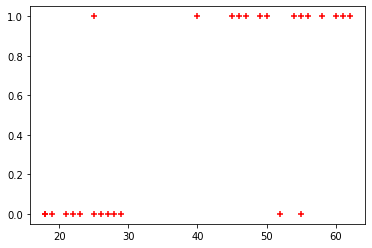

In [6]:
#plot the data
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [8]:
# Import train_test_split to split our dataset
from sklearn.model_selection import train_test_split

In [9]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [10]:
X_test

,age
5,56
9,61
11,28
6,55
10,18
0,22


In [11]:
#Import LogisticRegression model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
#fit the training data into our model - Training our model
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
X_test

,age
5,56
9,61
11,28
6,55
10,18
0,22


In [14]:
y_predicted = model.predict(X_test)

In [15]:
model.predict_proba(X_test)

array([[0.03866235, 0.96133765],
       [0.01787348, 0.98212652],
       [0.77329634, 0.22670366],
       [0.04500765, 0.95499235],
       [0.94336914, 0.05663086],
       [0.89830666, 0.10169334]])

In [29]:
model.predict([[60]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [30]:
model.predict([[20]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [16]:
model.score(X_test,y_test)

0.8333333333333334

In [17]:
y_predicted

array([1, 1, 0, 1, 0, 0])

In [18]:
X_test

,age
5,56
9,61
11,28
6,55
10,18
0,22


**model.coef_ indicates value of m in y=m*x + b equation**

In [19]:
model.coef_

array([[0.1585885]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [20]:
model.intercept_

array([-5.66749673])

**Lets defined sigmoid function now and do the math with hand**

In [21]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [22]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [23]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [24]:
age = 43
prediction_function(age)

0.568565299077705

**0.485 is more than 0.5 which means person with 43 will buy the insurance**